Chapter 2
Supervised Machine Learning (Batch Learning)

What is Supervised Machine Learning?
Regression vs Classification

Data Preparation and Preprocessing Techniques

In [112]:
# Import Dataset
import pandas as pd
df=pd.read_csv("Titanic-Dataset.csv")

In [39]:
# How Big Data is?
df.shape

(891, 12)

In [40]:
# How Data Looks Like?
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
# How Data Looks Like?
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [42]:
# How Data Looks Like?
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,A/5 3540,8.0500,NaN,S
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5000,NaN,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
450,451,0,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S


In [43]:
# Data Types Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
# Types of Data
# 1. Categorical Data
# 2. Numerical Data
# 3. Text Data
# 4. Image Data
# 5. Time Series Data


In [45]:
# How to find missing values in dataset?
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
# Analyze Data Mathematically
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
# Check for Duplicates
df.duplicated().sum()

0

In [48]:
# Value Counts Function
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [49]:
# How to check unique values in a column?
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [50]:
# Correlation with Target Variable
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation with the 'Survived' column
correlation_with_survived = numeric_df.corr()['Survived']
print(correlation_with_survived)


PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64


In [ ]:

# Next Steps after seeing the correlation

# Data Analysis
# Handling Missing Values
# Removing Duplicates
# Outlier Detection
# Handling Outliers
# Handling Categorical Data issues
# Handling Numerical Data issues
# Feature Engineering
# Feature Selection
# Data Transformation (Handling Skewness)
# Data Normalization (Scaling like standardization, MinMaxScaler, RobustScaler)
# Data Encoding (One-Hot Encoding, Label Encoding, Ordinal Encoding)
# Class Imbalance Handling
# Data Splitting
# Modeling
# Cross-Validation
# Hyperparameter Tuning
# Model Evaluation
# Model Interpretability
# Model Deployment

In [52]:
# Data Analysis Process
# There are 3 types of Data Analysis
# 1. Univariate Analysis
# we analyze one variable at a time

# 2. Bivariate Analysis
# we analyze two variables at a time

# 3. Multivariate Analysis
# we analyze more than two variables at a time

# Univariate Analysis
# 1. Categorical Data Analysis- Countplot, Pie Chart, Bar Chart
# 2. Numerical Data Analysis- Histogram, Boxplot

# Bivariate Analysis 
# 1. Categorical vs Categorical- CrossTab, Stacked Bar Chart, Grouped Bar Chart
# 2. Categorical vs Numerical- Bar Chart, Boxplot
# 3. Numerical vs Numerical- Scatter Plot

# Multivariate Analysis
# 1. Categorical vs Categorical vs Categorical- Stacked Bar Chart
# 2. Categorical vs Categorical vs Numerical- Grouped Bar Chart
# 3. Categorical vs Numerical vs Numerical- Line Chart
# 4. Numerical vs Numerical vs Numerical- 3D Scatter Plot




<Axes: xlabel='Survived', ylabel='count'>

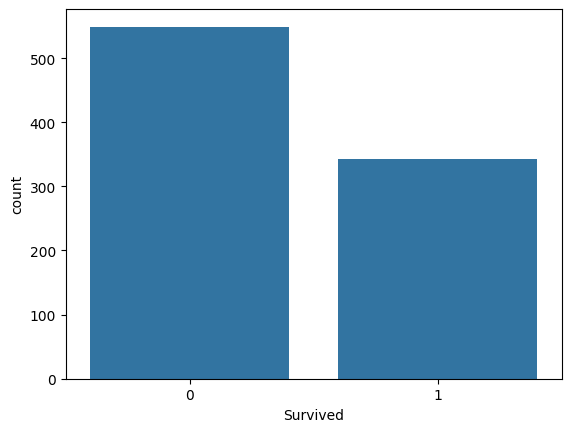

In [53]:
# Univariate Analysis

# Categorical Data Analysis using Countplot
import seaborn as sns
sns.countplot(x='Survived', data=df)


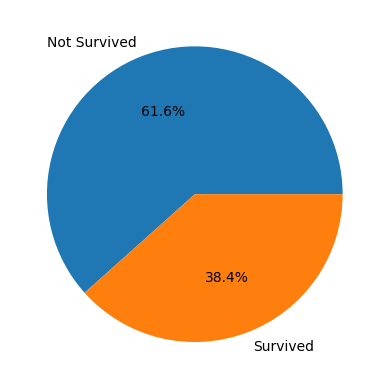

In [54]:
# Univariate Analysis

# Categorical Data Analysis using Pie Chart

import matplotlib.pyplot as plt
plt.pie(df['Survived'].value_counts(), labels=['Not Survived', 'Survived'], autopct='%1.1f%%')
plt.show()


<Axes: xlabel='Survived'>

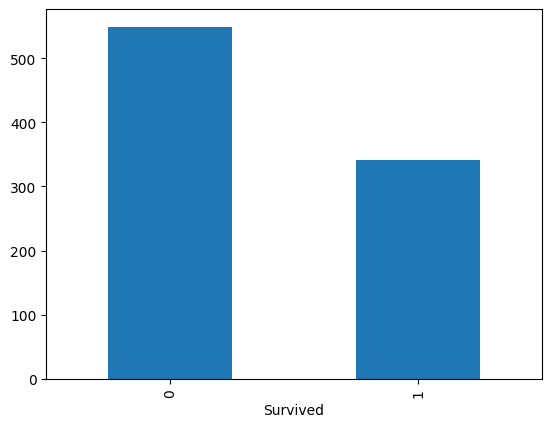

In [55]:
# Univariate Analysis

# Categorical Data Analysis using Bar Chart
df['Survived'].value_counts().plot(kind='bar')


<Axes: ylabel='Frequency'>

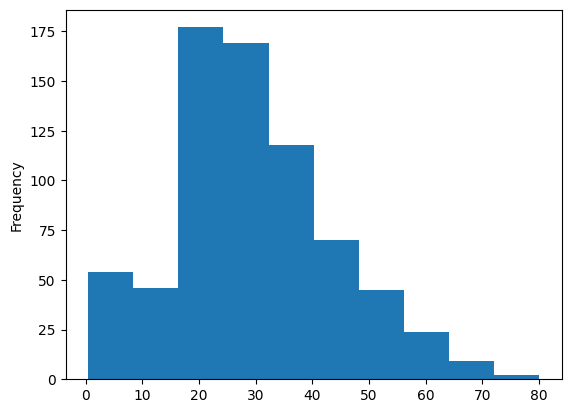

In [56]:
# Univariate Analysis

# Numerical Data Analysis using Histogram
df['Age'].plot(kind='hist')


<Axes: >

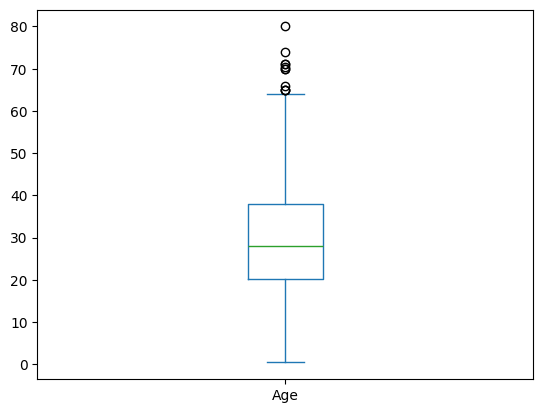

In [57]:
# Univariate Analysis

# Numerical Data Analysis using Boxplot

df['Age'].plot(kind='box')


In [60]:
# Bivariate Analysis
# Categories vs Categpries using CrossTab
pd.crosstab(df['Sex'], df['Survived'], margins=True, margins_name="Total")


Survived,0,1,Total
Sex,,,
female,81,233,314
male,468,109,577
Total,549,342,891


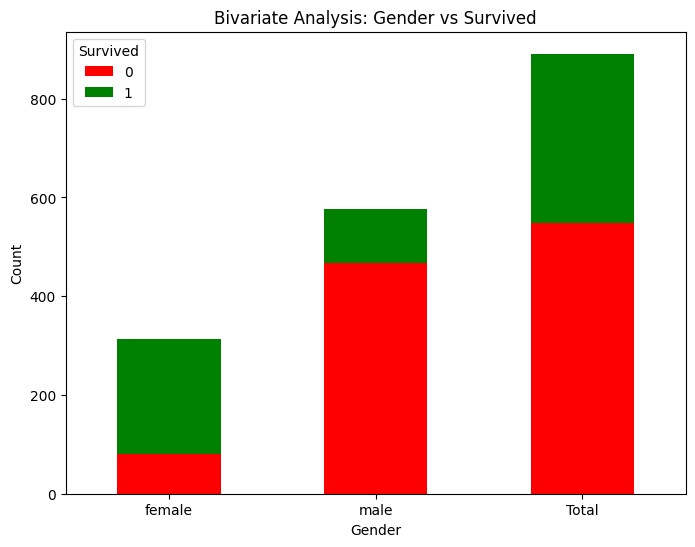

In [61]:
# Bivariate Analysis
# Categories vs Categories using Stacked Bar Chart

# Perform Cross Tabulation to get counts of each category
cross_tab = pd.crosstab(df['Sex'], df['Survived'], margins=True, margins_name="Total")

# Plotting Stacked Bar Chart
cross_tab.drop('Total', axis=1).plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8,6))

# Adding labels and title
plt.title('Bivariate Analysis: Gender vs Survived')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Show the plot
plt.show()

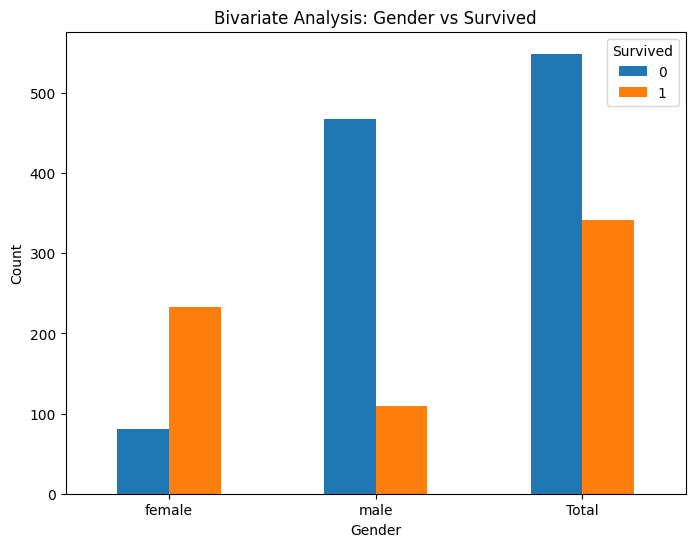

In [62]:
# Bivariate Analysis
# Catogries vs Catogries using Grouped Bar Chart

# Perform Cross Tabulation to get counts of each category
cross_tab = pd.crosstab(df['Sex'], df['Survived'], margins=True, margins_name="Total")

# Plotting Grouped Bar Chart
cross_tab.drop('Total', axis=1).plot(kind='bar', stacked=False, figsize=(8,6))

# Adding labels and title
plt.title('Bivariate Analysis: Gender vs Survived')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Show the plot
plt.show()

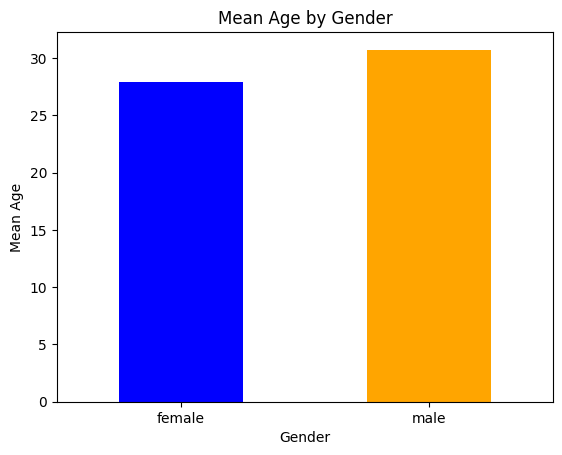

In [ ]:
# Bivariate Analysis
# Categories vs Numerical using Bar Chart

df.groupby('Sex')['Age'].mean().plot(kind='bar', color=['blue', 'orange'])

# Adding labels and title
plt.title('Mean Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Age')
plt.xticks(rotation=0)

# Show the plot
plt.show()

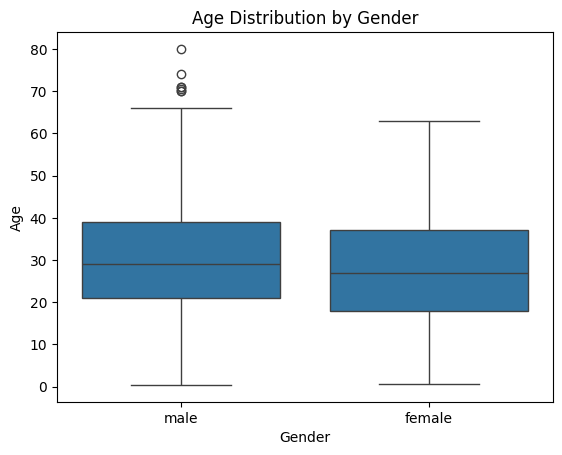

In [65]:
# Bivariate Analysis
# Categories vs Numerical using  Boxplot

# Plotting a Boxplot: Age by Gender
sns.boxplot(x='Sex', y='Age', data=df)

# Adding labels and title
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')

# Show the plot
plt.show()

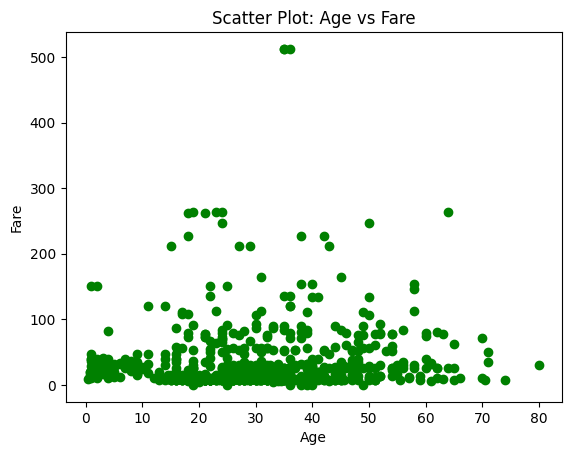

In [66]:
# Bivariate Analysis
# Numerical vs Numerical using Scatter Plot

# Plotting a Scatter Plot: Age vs Fare
plt.scatter(df['Age'], df['Fare'], color='green')

# Adding labels and title
plt.title('Scatter Plot: Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

# Show the plot
plt.show()



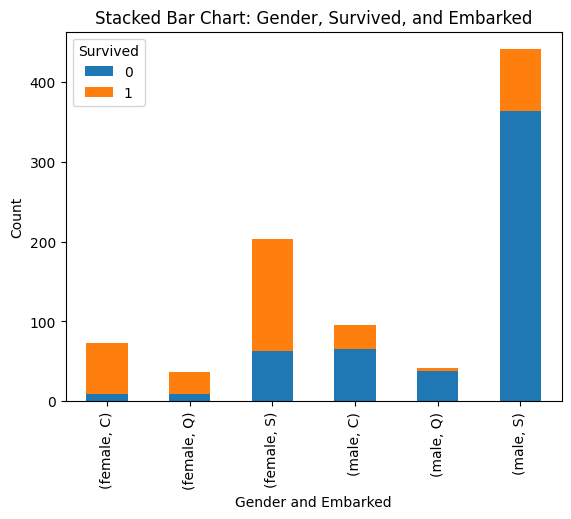

In [67]:
# Multivariate Analysis using Stacked Bar Chart
# Categories vs Categories vs Categories using Stacked Bar Chart

# Stacked Bar Chart: Gender, Survived, and Embarked
pd.crosstab([df['Sex'], df['Embarked']], df['Survived']).plot(kind='bar', stacked=True)

# Adding labels and title
plt.title('Stacked Bar Chart: Gender, Survived, and Embarked')
plt.xlabel('Gender and Embarked')
plt.ylabel('Count')

# Show the plot
plt.show()

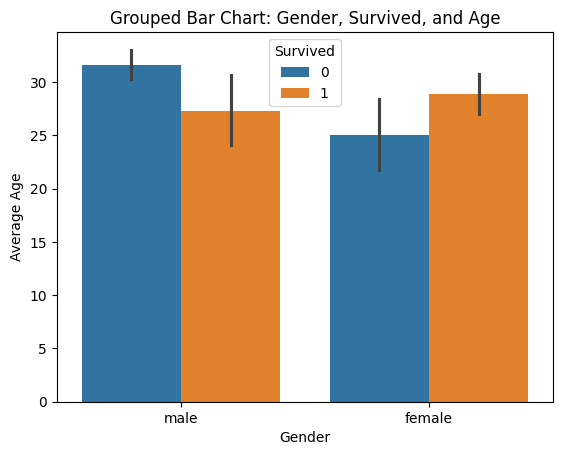

In [68]:
# Multivariate Analysis using Grouped Bar Chart
# Categories vs Categories vs Numerical using Grouped Bar Chart

# Grouped Bar Chart: Gender and Survived with average Age
sns.barplot(x='Sex', y='Age', hue='Survived', data=df)

# Adding labels and title
plt.title('Grouped Bar Chart: Gender, Survived, and Age')
plt.xlabel('Gender')
plt.ylabel('Average Age')

# Show the plot
plt.show()

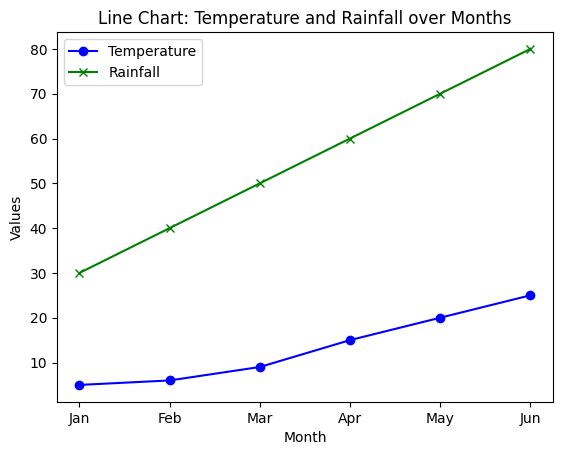

In [70]:
# Multivariate Analysis using Line Chart
# Categories vs Numerical vs Numerical using Line Chart

import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
    'Temperature': [5, 6, 9, 15, 20, 25],
    'Rainfall': [30, 40, 50, 60, 70, 80]
}

# Creating a DataFrame
data = pd.DataFrame(data)

# Line Chart: Temperature and Rainfall over months
plt.plot(data['Month'], data['Temperature'], label='Temperature', color='blue', marker='o')
plt.plot(data['Month'], data['Rainfall'], label='Rainfall', color='green', marker='x')

# Adding labels and title
plt.title('Line Chart: Temperature and Rainfall over Months')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()




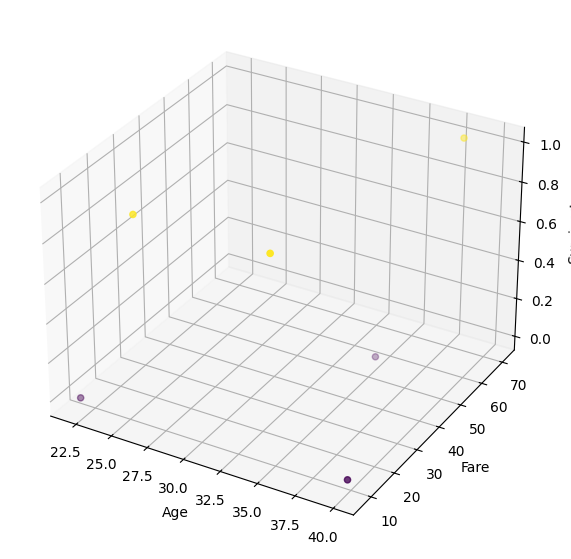

In [72]:
# Multivariate Analysis using 3D Scatter Plot
# Numerical vs Numerical vs Numerical using 3D Scatter Plot

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Sample data
data2 = {
    'Age': [22, 38, 26, 35, 35, 40],
    'Fare': [7.25, 71.28, 7.92, 53.1, 8.05, 8.46],
    'Survived': [0, 1, 1, 0, 1, 0]
}

# Creating a DataFrame
data2 = pd.DataFrame(data2)

# Creating a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with Age, Fare, and Survived
ax.scatter(data2['Age'], data2['Fare'], data2['Survived'], c=data2['Survived'], cmap='viridis')

# Adding labels
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_zlabel('Survived')

# Show the plot
plt.show()


In [ ]:
# Handling Missing Values
# Missing values are very common in real-world datasets
# Missing values can be represented as NaN, ?, or just a blank cell

# There are multiple ways to handle missing values
# 1. Drop Rows with Missing Values
df.dropna()

# 2. Drop Columns with Missing Values
df.dropna(axis=1)

# 3. Impute Missing Values using Mean, Median, Mode
df['Age'].fillna(df['Age'].median(), inplace=True)

# Key Notes on Handling Missing Values
# 1. Dropping rows with missing values can lead to loss of valuable data
# 2. Dropping columns with missing values can lead to loss of valuable features
# 3. Imputing missing values can lead to incorrect data analysis results
# 4. Always understand the data before handling missing values

# Handling Numerical Data
# Numerical data is data that represents numbers
# Numerical data can be continuous or discrete

# Example of Continuous Data: Age, Height, Weight, Temperature
# Continuous data can take any value within a range
# Age: 25.3 years, 45.75 years
# Height: 167.5 cm, 172.3 cm
# Weight: 68.4 kg, 75.9 kg
# Temperature: 36.6°C, 98.2°F

# Example of Discrete Data: Number of Siblings, Number of Children
# Discrete data involves counts or distinct values. It cannot take fractions or decimals (only whole numbers).

# Number of Siblings: 0, 1, 2, 3, 4
# Number of Children: 0, 1, 2, 3
# Days Absent from Work: 0, 2, 4, 10

# Fill missing values using mean, median
# If outlier in data then use median otherwise use mean

# Handling Categorical Data
# Categorical data is non-numeric data that represents categories
# Categorical data can be ordinal or nominal
# Ordinal data has a natural order
# Nominal data does not have a natural order
# fill using mode

In [113]:
# Remove Duplicates
df.drop_duplicates(inplace=True)

# Verify the changes
print(f"Number of rows after removing duplicates: {len(df)}")


Number of rows after removing duplicates: 891


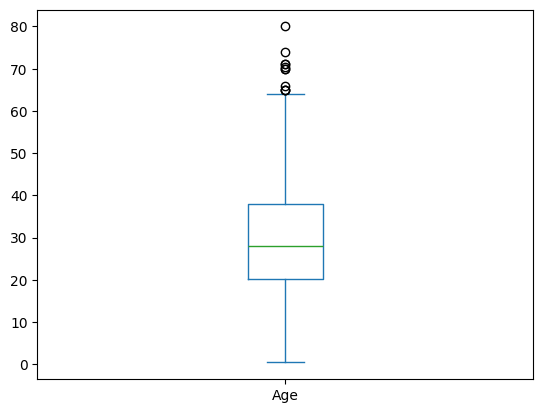

In [74]:
# Outlier Detection
# An outlier is a data point that differs significantly from other data points
# Outliers can affect the results of data analysis
# Outliers can be detected using statistical methods
# Outliers can be removed or imputed
# outliers only in numerical data not in categorical data

# How to Detect Outliers?
# 1. Box Plot
# code
import matplotlib.pyplot as plt
df['Age'].plot(kind='box')
plt.show()


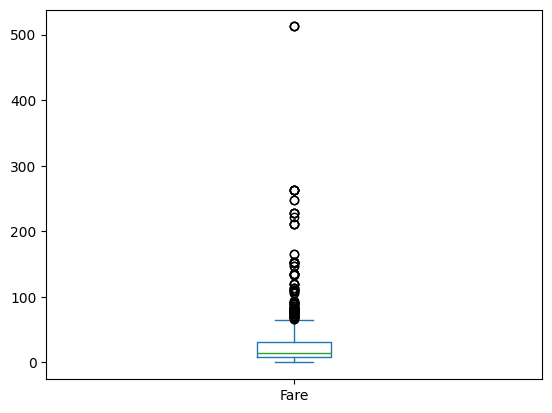

In [17]:
import matplotlib.pyplot as plt
df['Fare'].plot(kind='box')
plt.show()

<Axes: xlabel='Age', ylabel='Fare'>

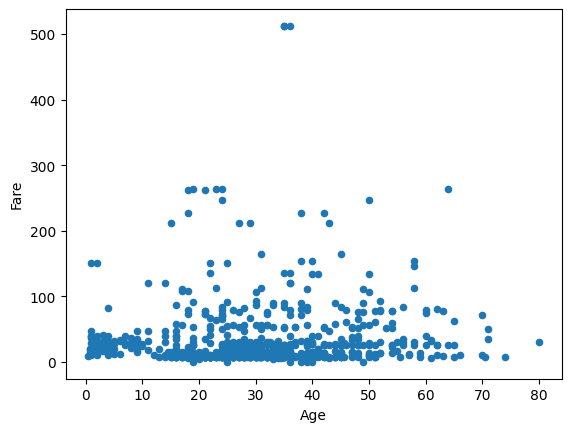

In [15]:
# Outlier Detection using scatter plot
df.plot.scatter(x='Age', y='Fare')

In [16]:
# Outlier Detection using Descriptive Statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# Normal Distribution
# It basically means how the data is distributed

# How to check if data is normally distributed?
# 1. Histogram
# 2. Usiing skew function

<Axes: >

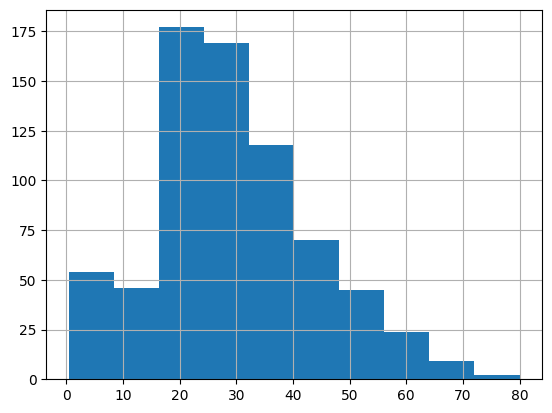

In [19]:
# Check for Normal Distribution using Histogram
df['Age'].hist()

<Axes: >

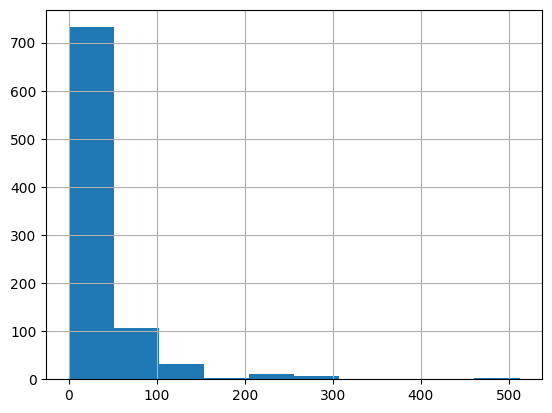

In [20]:
# Check for Normal Distribution using Histogram
df['Fare'].hist()

In [24]:
# Check for Normal Distribution using Skew
# Generaaly, we consider data is normally distributed if skew value is between -0.5 to 0.5
# If skew value is less than -0.5 then data is left skewed
# If skew value is greater than 0.5 then data is right skewed

age=df['Age'].skew()
fare= df['Fare'].skew()
print(age, fare)

0.38910778230082704 4.787316519674893


In [26]:
# Outlier Detection for Normal Distribution
# Using Z-Score

# Before applying Z-Score, we need to fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)

import numpy as np

# Calculate Z-Score
mean_age = df['Age'].mean()
std_age = df['Age'].std()
df['z_score'] = (df['Age'] - mean_age) / std_age

# Define a threshold for Z-Score (commonly 3 or -3 for normal distribution)
threshold = 3

# Identify outliers
outliers = df[np.abs(df['z_score']) > threshold]

print("Outliers in the 'Age' column:")
print(outliers)


Outliers in the 'Age' column:
     PassengerId  Survived  Pclass                                  Name  \
96            97         0       1             Goldschmidt, Mr. George B   
116          117         0       3                  Connors, Mr. Patrick   
493          494         0       1               Artagaveytia, Mr. Ramon   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
672          673         0       2           Mitchell, Mr. Henry Michael   
745          746         0       1          Crosby, Capt. Edward Gifford   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked   z_score  
96   male  71.0      0      0    PC 17754  34.6542    A5        C  3.198110  
116  male  70.5      0      0      370369   7.7500   NaN        Q  3.159706  
493  male  71.0      0      0    PC 17609  49.5042   NaN        C  3.198110  
630  male  80.0      0      0       27042  30.000

C:\Users\user\AppData\Local\Temp\ipykernel_11024\1166235816.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [27]:
# Outlier Detection for left and right Skewed Distribution
# Using IQR 

# Before applying IQR, we need to fill missing values
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Calculate IQR
Q1 = df['Fare'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df['Fare'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1                   # Interquartile Range

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]

print("Outliers in the 'Fare' column:")
print(outliers)


Outliers in the 'Fare' column:
     PassengerId  Survived  Pclass  \
1              2         1       1   
27            28         0       1   
31            32         1       1   
34            35         0       1   
52            53         1       1   
..           ...       ...     ...   
846          847         0       3   
849          850         1       1   
856          857         1       1   
863          864         0       3   
879          880         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female  28.0      1   
34                             Meyer, Mr. Edgar Joseph    male  28.0      1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
..                                    

In [114]:
# Remove Outliers for Normal Distribution (Z-Score)(age)

# Calculate Z-Score for 'Age'
import pandas as pd
import numpy as np


# Calculate Z-Score for 'Age'
mean_age = df['Age'].mean()
std_age = df['Age'].std()
df['z_score_age'] = (df['Age'] - mean_age) / std_age

# Define a threshold for Z-Score
threshold = 3

# Remove outliers by filtering the DataFrame based on the Z-Score
df = df[np.abs(df['z_score_age']) <= threshold]

# Drop the 'z_score_age' column (optional)
df = df.drop(columns=['z_score_age'])





In [115]:
# Remove Outliers for Skewed Distribution (IQR)(fare)

# Calculate IQR for 'Fare'
Q1 = df['Fare'].quantile(0.25)  # 25th percentile
Q3 = df['Fare'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers_fare = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

print("Data after removing outliers from 'Fare':")
print(df_no_outliers_fare)


Data after removing outliers from 'Fare':
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
885          886         0       3   
886          887         0       2   
887          888         1       1   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                         

In [116]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [117]:
# Handling Categorical Data Issues

# Before handling categorical data issues, we first have to identify all errors in the categorical data

# First we need to identify which columns have categorical data in the dataset 
# In our Dataset categorical columns are
# 1.Survived
# 2.Pclass
# 3.Sex
# 4.Embarked

# After identifying categorical columns, we need to check for errors in the data
# Start with Survived column

# 1. Check value count in the 'Survived' column
value_count=df['Survived'].value_counts()
print(value_count)
# Here we can see that there are only 2 unique values in the 'Survived' column, which is correct
# One potential error is this column have imbalance data and since it is target column, we need to handle it

# 2 Check value count in the 'Pclass' column
value_count_p=df['Pclass'].value_counts()
print(value_count_p)
# Here we can see that there are only 3 unique values in the 'Pclass' column, which is correct
# No error in this column

# 3 check value count of Sex column
value_count_s= df['Sex'].value_counts()
print(value_count_s)
# Here we can see that there are only 2 unique values 
# Here also daata is imbalance, male is more than 50% of data while female is less than 50% of data

# 4 check value count of Embarked column
value_count_e= df['Embarked'].value_counts()
print(value_count_e)
# Here we can see that there are only 3 unique values
# Here also data is imbalance, S is more than 50% of data While C IS 20% and Q is 10% of data

# There is no more error in the categorical data
# Now we can move to next step

# Remove Unused columns from the dataset
# In our dataset, we have 'PassengerId', 'Name', 'Ticket', and 'Cabin' columns that are not useful for analysis
# We can remove these columns from the dataset

# Drop the 'PassengerId', 'Name', 'Ticket', and 'Cabin' columns
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])


Survived
0    423
1    289
Name: count, dtype: int64
Pclass
3    354
1    185
2    173
Name: count, dtype: int64
Sex
male      451
female    261
Name: count, dtype: int64
Embarked
S    552
C    130
Q     28
Name: count, dtype: int64


In [118]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [119]:
# Handling Numerical Data Issues
# Before handling numerical data issues, we first have to identify numerical columns in the dataset

# In our dataset numerical columns are
# 1. Age
# 2. SibSp
# 3. Parch
# 4. Fare

# After identifying numerical columns, we need to check for errors in the data
# Start with Age column

age= df['Age'].describe()
print(age)
# Here we can see that minimum age is 0.42 and maximum age is 71 
# 75% of data is below 38 and 25% of data is below 20
# There is potential outlier in the data
# Change data type of Age column to int

# Check for SibSp column
# SibSp column is number of siblings or spouses aboard the Titanic
# Check for errors in the data
sib_sp= df['SibSp'].describe()
print(sib_sp) 
# Here we can see that minimum value is 0 and maximum value is 5 
# 75% of data is below 1 and 25% of data is below 0
# Solve potential outlier in the data
# Change data type of SibSp column to int


# Check for Parch column
# Parch column is number of parents or children aboard the Titanic
# Check for errors in the data
parch= df['Parch'].describe()
print(parch)
# Here we can see that minimum value is 0 and maximum value is 6
# 75% of data is below 1 and 25% of data is below 0
# Solve potential outlier in the data
# Change data type of Parch column to int

# Check for Fare column
# Fare column is the ticket fare
# Check for errors in the data
fare= df['Fare'].describe()
print(fare)
# Here we can see that minimum value is 0 and maximum value is 512.33
# 75% of data is below 33 and 25% of data is below 0
# Solve potential outlier in the data
# Change data type of Fare column to int

# Afer checking all numerical columns, we can move to next step



count    712.00000
mean      29.56625
std       14.32746
min        0.42000
25%       20.00000
50%       28.00000
75%       38.00000
max       71.00000
Name: Age, dtype: float64
count    712.000000
mean       0.514045
std        0.930692
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        5.000000
Name: SibSp, dtype: float64
count    712.000000
mean       0.432584
std        0.854181
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        6.000000
Name: Parch, dtype: float64
count    712.000000
mean      34.738916
std       52.983378
min        0.000000
25%        8.050000
50%       15.741700
75%       33.630200
max      512.329200
Name: Fare, dtype: float64


In [104]:
# After finding the all issues of data, we need to solve them one by one

In [120]:
# Feature Engineering
# Feature Engineering is the process of creating new features from existing features
# Feature Engineering can help improve the performance of machine learning models
# Feature Engineering can involve creating new features, transforming existing features, and selecting important features

# Feature Engineering Techniques
# 1. Creating New Features
# 2. Transforming Existing Features
# 3. Selecting Important Features

# Creating New Features
# We can create new features by combining existing features
# Example: We can create a new feature 'FamilySize' by adding 'SibSp' and 'Parch'

# Create a new feature 'FamilySize' by adding 'SibSp' and 'Parch'
df['FamilySize'] = df['SibSp'] + df['Parch']


In [121]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [122]:
# Since we have created new feature 'FamilySize', we can remove 'SibSp' and 'Parch' columns
df = df.drop(columns=['SibSp', 'Parch'])


In [123]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [124]:
df['FamilySize'].value_counts()

FamilySize
0    402
1    139
2     93
3     27
5     22
6     12
4     11
7      6
Name: count, dtype: int64

In [ ]:
# After creating new feature 'FamilySize', we can move to next step
# Now we can even transform FamilySize into binary column like small, medium, large family based on the values of FamilySize

# Transform the 'FamilySize' column into binary categories
# Update 'FamilySize' to categorical based on specified bins
# Make sure FamilySize is numeric (just in case it's not)
df['FamilySize'] = pd.to_numeric(df['FamilySize'], errors='coerce')

df['FamilySize'] = pd.cut(df['FamilySize'], bins=[0, 1, 3, 20, float('inf')], labels=['Small', 'Medium', 'Large', 'Very Large'])

# Transforming Existing Features
# We can transform existing features to make them more suitable for analysis
# Example: We can transform the 'Age' column into age groups

# Transform the 'Age' column into age groups
# Update 'Age' to categorical based on specified bins
df['Age'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 80], labels=['Child', 'Young', 'Adult', 'Senior'])




In [130]:
# Further we can transform Fare column into fare groups
# Transform the 'Fare' column into fare groups
# Update 'Fare' to categorical based on specified bins
df['Fare'] = pd.cut(df['Fare'], bins=[0, 10, 20, 30, 40, 50, 100, 200, float('inf')], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-100', '100-200', '200+'])


In [131]:
# This way we can do feature engineering in machine learning

In [ ]:
# Feature Selection
# Feature Selection is the process of selecting important features for analysis
# Feature Selection can help improve the performance of machine learning models
# Feature Selection can involve removing irrelevant features, redundant features, or highly correlated features

# Feature Selection Techniques
# 1. Using Domain Knowledge

In [32]:
# Data Transformation

# Check for Normal Distribution using Skew
# Generaaly, we consider data is normally distributed if skew value is between -0.5 to 0.5
# If skew value is less than -0.5 then data is left skewed
# If skew value is greater than 0.5 then data is right skewed

age=df['Age'].skew()
fare= df['Fare'].skew()
print(age, fare)

0.5102446555756495 4.787316519674893


In [33]:
# Here, 'Age' is right skewed and 'Fare' is right skewed because skew value is greater than 0.5
# So we need to apply transformation to make it normally distributed
# For right skewed data, we can apply log1p transformation
# For left skewed data, we can apply Box-Cox transformation

# Note, we dont apply box cox where data is zero or negative values so alternative is yeo-johnson transformation
# Note, if there is 0 in right skewed data then we can apply log1p else we can apply log 


In [35]:
# Program to check what to apply in age and fare

import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

def suggest_transformation(df, column_name):
    skewness = df[column_name].skew()
    print(f"Skewness of {column_name}: {skewness}")

    # Right-Skewed Data
    if skewness > 0.5:  
        # Check for zero or negative values
        if (df[column_name] <= 0).any():  # Contains zero or negative values
            print(f"Suggested Transformation for {column_name}: Use log1p (log(1+x))")
            print(f"Reason: The data is right-skewed (skewness = {skewness}), and contains zero or negative values. Use log1p(x) to handle zeros.")
        else:
            print(f"Suggested Transformation for {column_name}: Use log (log(x))")
            print(f"Reason: The data is right-skewed (skewness = {skewness}), and contains only positive values. Use log(x).")
    
    # Left-Skewed Data
    elif skewness < -0.5:  
        # Check for zero or negative values
        if (df[column_name] <= 0).any():  # Contains zero or negative values
            print(f"Suggested Transformation for {column_name}: Use Yeo-Johnson Transformation")
            print(f"Reason: The data is left-skewed (skewness = {skewness}), and contains zero or negative values. Use Yeo-Johnson transformation.")
        else:
            print(f"Suggested Transformation for {column_name}: Use Box-Cox Transformation")
            print(f"Reason: The data is left-skewed (skewness = {skewness}), and contains only positive values. Use Box-Cox transformation.")
    
    # Data is approximately normal
    else:
        print(f"{column_name} is approximately normal (skewness = {skewness}). No transformation needed.")
    
# Example: Apply to any column in your dataframe
df = df.copy()  # Make a copy of the original dataframe before applying transformations

# Call the function for any column (e.g., 'Age' or 'Fare')
suggest_transformation(df, 'Age')
suggest_transformation(df, 'Fare')



Skewness of Age: 0.5102446555756495
Suggested Transformation for Age: Use log (log(x))
Reason: The data is right-skewed (skewness = 0.5102446555756495), and contains only positive values. Use log(x).
Skewness of Fare: 4.787316519674893
Suggested Transformation for Fare: Use log1p (log(1+x))
Reason: The data is right-skewed (skewness = 4.787316519674893), and contains zero or negative values. Use log1p(x) to handle zeros.


In [36]:
import numpy as np

# Apply log transformation to Age (right-skewed, only positive values)
df['Age'] = np.log(df['Age'])  # Apply log(x) transformation to Age
print("Applied log transformation to Age")

# Apply log1p transformation to Fare (right-skewed, might contain zero or negative values)
df['Fare'] = np.log1p(df['Fare'])  # Apply log(1 + x) transformation to Fare
print("Applied log1p transformation to Fare")

# Check the first few rows to confirm the transformations
df[['Age', 'Fare']].head()


Applied log transformation to Age
Applied log1p transformation to Fare


,Age,Fare
0,3.091042,2.110213
1,3.637586,4.280593
2,3.258097,2.188856
3,3.555348,3.990834
4,3.555348,2.202765


In [132]:
# Data Normalization
# Data Normalization is the process of scaling data to a fixed range
# Data Normalization can help improve the performance of machine learning models
# Data Normalization can involve scaling features to a range of [0, 1] or [-1, 1]

# Data Normalization Techniques
# 1. Standardization (We use often)
# 2. Min-Max Scaling 
# 3. Robust Scaling (Specifically for Outliers)

In [133]:
# Data Encoding
# Data Encoding is the process of converting categorical data into numerical data
# Data Encoding can help improve the performance of machine learning models
# Data Encoding can involve converting text data into numerical data using techniques 
# like One-Hot Encoding, Label Encoding, and Ordinal Encoding  

# We use One-Hot Encoding for Categorical Data which is nominal data
# We use Label Encoding for Categorical Data which is ordinal data 



In [134]:
# Make a target column balanced here before going to data split
# Class Imbalance Handling
# Class Imbalance is a common problem in machine learning
# Class Imbalance occurs when one class has significantly more samples than another class
# Class Imbalance can lead to biased machine learning models
# Class Imbalance can be handled using techniques like Oversampling, Undersampling, and SMOTE


In [135]:
# Train-Test Split
# Train-Test Split is the process of splitting data into training and testing sets
# Train-Test Split can help evaluate the performance of machine learning models
# Train-Test Split can involve splitting data into training and testing sets using a specified ratio (e.g., 80-20)


In [136]:
# Modeling
# Modeling is the process of building machine learning models
# Modeling can involve selecting the appropriate machine learning algorithm
# Modeling can involve training the machine learning model on the training data
# Modeling can involve evaluating the machine learning model on the testing data


In [137]:
# Evaluation
# Evaluation is the process of assessing the performance of machine learning models
# Evaluation can involve using metrics like Accuracy, Precision, Recall, F1 Score, and ROC-AUC
# Evaluation can involve using techniques like Cross-Validation and Hyperparameter Tuning


In [138]:
# Model Interpretability
# Model Interpretability is the process of understanding how machine learning models make predictions
# Model Interpretability can involve understanding the importance of features in machine learning models
# Model Interpretability can involve visualizing the decision-making process of machine learning models


In [139]:
# Model Deployment
# Model Deployment is the process of making machine learning models available for use
# Model Deployment can involve deploying machine learning models as web applications, APIs, or services
# Model Deployment can involve monitoring the performance of machine learning models in production
